In [30]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

In [14]:
!pip install chardet

In [15]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [1]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

### 1. Imported the data:

In [17]:
base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [18]:
de_data = pd.read_csv( r'../../_data/data_dengue_peru.csv', encoding = charenc)
de_data.head( 5 )

C:\Users\Claudia\AppData\Local\Temp\ipykernel_21176\4195799303.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  de_data = pd.read_csv( r'../../_data/data_dengue_peru.csv', encoding = charenc)


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0


In [23]:
de_data = de_data.rename({'Ubigeo':'UBIGEO'}, axis =1 )
de_data 

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,UBIGEO,Casos,Ubigeo departamento,Ubigeo provincia
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,80,8091
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,80,8091
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,80,8091
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


### 2. Generate ubigeo for Departments and Provinces taking the first two and four numbers

In [19]:
de_data.dtypes

Año                 int64
Semana              int64
Eventos o daños    object
Departamento       object
Distrito           object
Provincia          object
Ubigeo              int64
Casos              object
dtype: object

In [25]:
de_data['Ubigeo departamento'] = de_data['UBIGEO'].astype(str).str[:2] 
de_data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,UBIGEO,Casos,Ubigeo departamento,Ubigeo provincia
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,80,8091
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,80,8091
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,80,8091
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [26]:
de_data['Ubigeo provincia'] = de_data['UBIGEO'].astype(str).str[:4] 
de_data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,UBIGEO,Casos,Ubigeo departamento,Ubigeo provincia
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,80,8091
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,80,8091
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,80,8091
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


#### Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

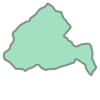

In [3]:
maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
maps["geometry"][0]

In [5]:
maps

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [7]:
maps['UBIGEO'].is_unique

maps['UBIGEO'].unique().size

1874

In [8]:
maps.geo = maps[['UBIGEO', 'geometry']]
maps.geo

C:\Users\Claudia\AppData\Local\R-MINI~1\envs\geogidahatari\lib\site-packages\geopandas\geodataframe.py:199: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)


,UBIGEO,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [9]:
maps.geo.dtypes

UBIGEO        object
geometry    geometry
dtype: object

In [10]:
maps.geo['UBIGEO'] = maps.geo['UBIGEO'].astype(str).astype(int)
maps.geo

C:\Users\Claudia\AppData\Local\R-MINI~1\envs\geogidahatari\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,UBIGEO,geometry
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [11]:
#  WGS-84 (longitud-latitud projection) 
maps.geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
de_data_2021 = de_data[de_data.Año == 2021]
de_data_2021

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,UBIGEO,Casos,Ubigeo departamento,Ubigeo provincia
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,15,1501
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,15,1501
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,15,1501
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [41]:
dataset1 = pd.merge(maps.geo, de_data_2021, how="inner", on="UBIGEO")
dataset1

,UBIGEO,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,Ubigeo departamento,Ubigeo provincia
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,1.0,14,1401
1,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0.0,14,1401
2,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,41,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,14,1401
3,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,42,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,14,1401
4,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,43,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,14,1401
...,...,...,...,...,...,...,...,...,...,...,...
24852,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,15,Dengue,JUNIN,MAZAMARI,SATIPO,6,12,1206
24853,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,16,Dengue,JUNIN,MAZAMARI,SATIPO,6,12,1206
24854,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,20,Dengue,JUNIN,MAZAMARI,SATIPO,7,12,1206
24855,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,21,Dengue,JUNIN,MAZAMARI,SATIPO,5,12,1206


In [61]:
dataset1['Casos'] = dataset1['Casos'].astype(str).apply(lambda x: x.replace('.0',''))
dataset1

,UBIGEO,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,Ubigeo departamento,Ubigeo provincia
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,1,14,1401
1,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,14,1401
2,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,41,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,nan,14,1401
3,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,42,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,nan,14,1401
4,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,43,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,nan,14,1401
...,...,...,...,...,...,...,...,...,...,...,...
24852,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,15,Dengue,JUNIN,MAZAMARI,SATIPO,6,12,1206
24853,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,16,Dengue,JUNIN,MAZAMARI,SATIPO,6,12,1206
24854,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,20,Dengue,JUNIN,MAZAMARI,SATIPO,7,12,1206
24855,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,21,Dengue,JUNIN,MAZAMARI,SATIPO,5,12,1206


In [65]:
dataset1.dtypes

UBIGEO                    int32
geometry               geometry
Año                       int64
Semana                    int64
Eventos o daños          object
Departamento             object
Distrito                 object
Provincia                object
Casos                    object
Ubigeo departamento      object
Ubigeo provincia         object
dtype: object

In [69]:
dataset1['Casos'].convert_dtypes()
dataset1['Casos'].to_numeric(s, errors='coerce')
dataset1

AttributeError: 'Series' object has no attribute 'to_numeric'

<AxesSubplot:>

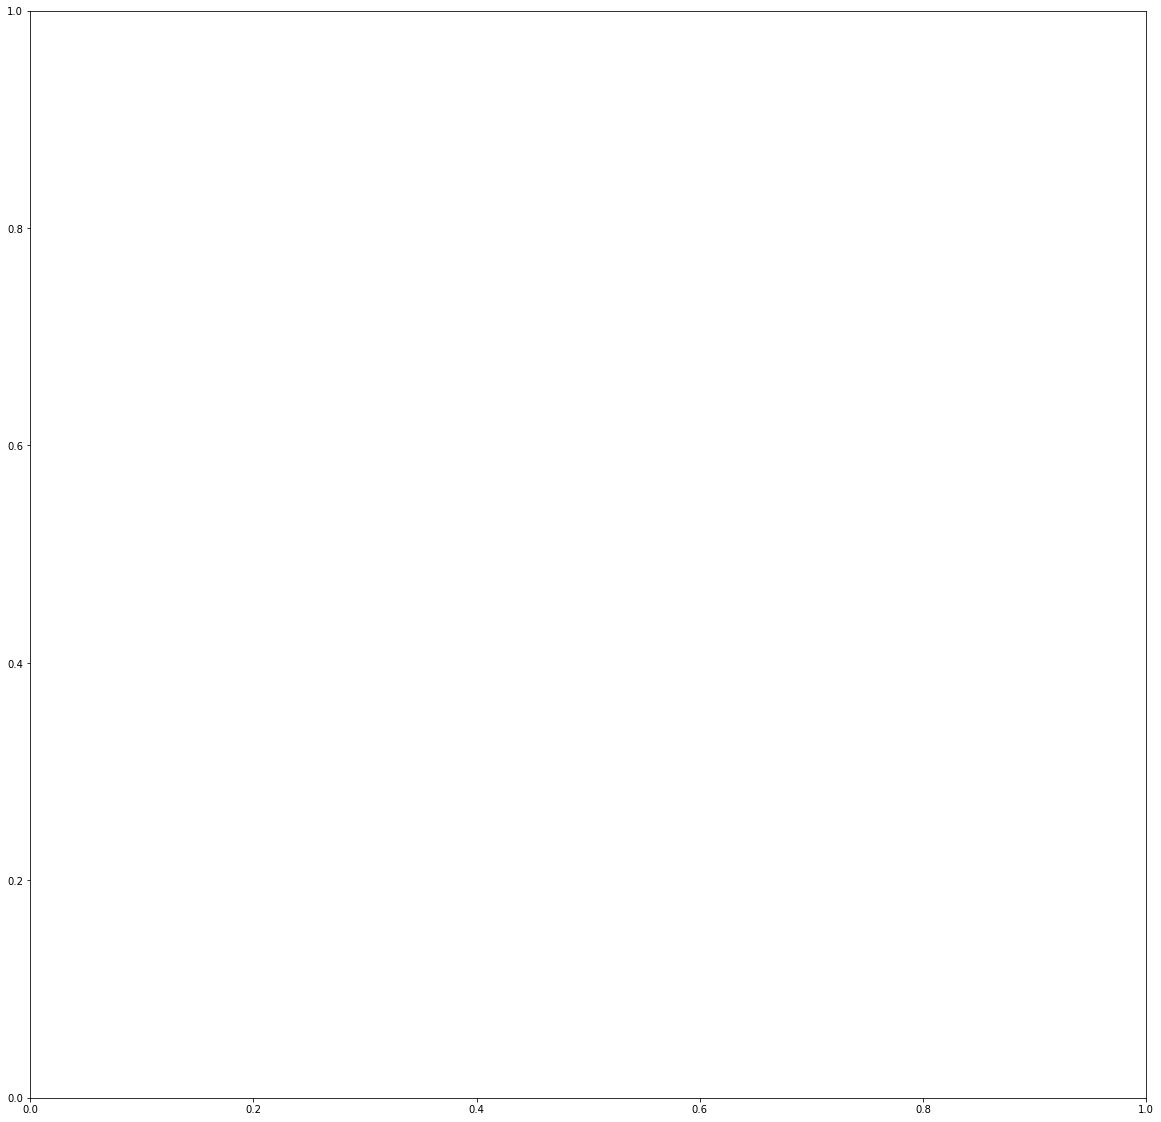

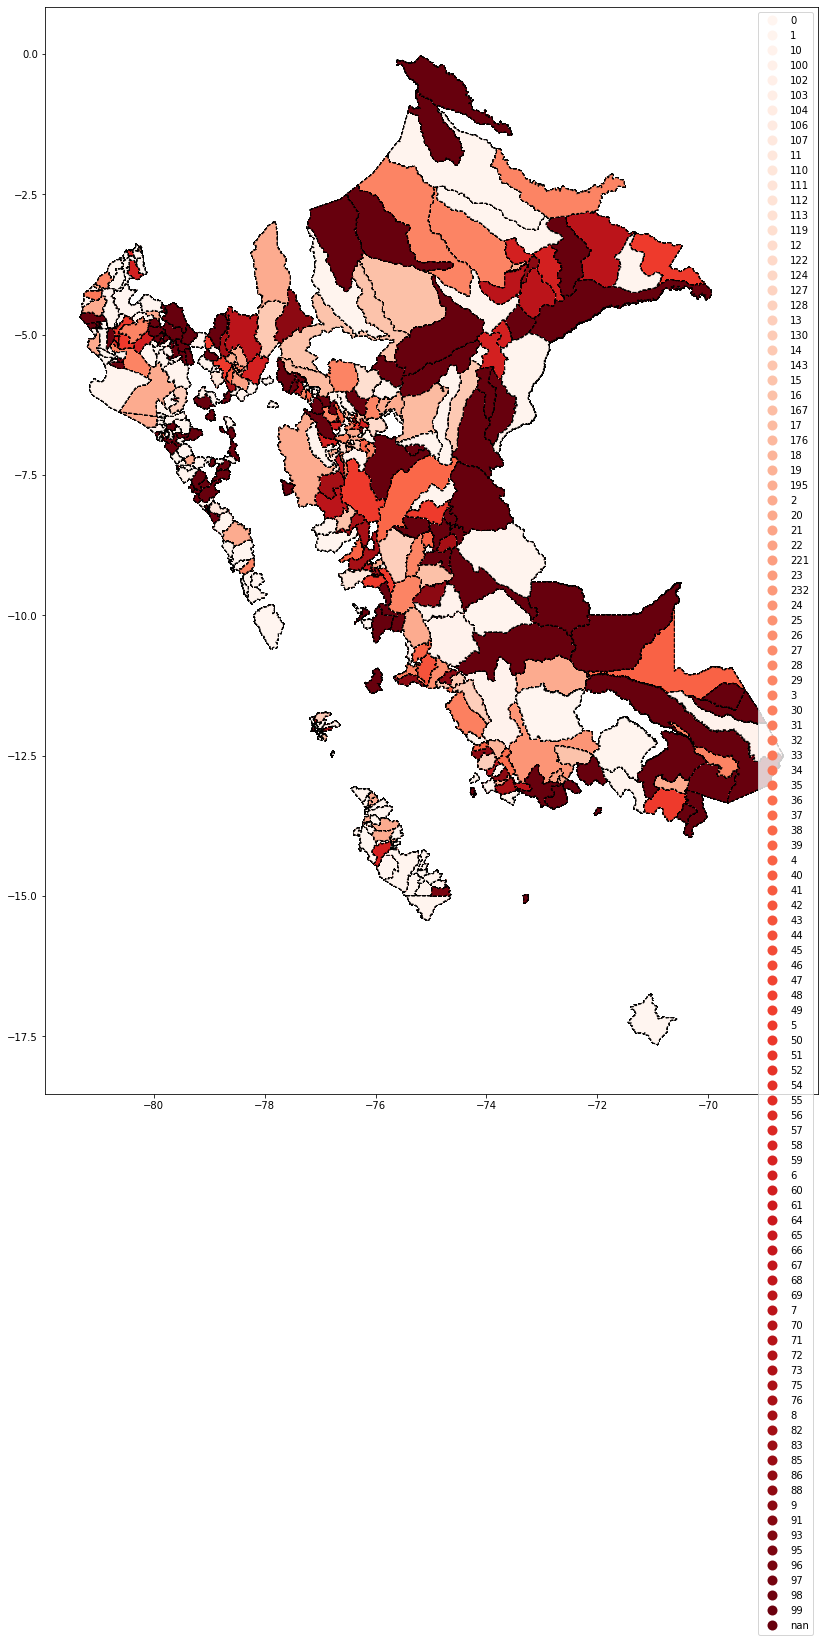

In [64]:
fig, ax = plt.subplots(figsize=(20, 20))
dataset1.plot( column='Casos', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

TypeError: 'NoneType' object is not subscriptable

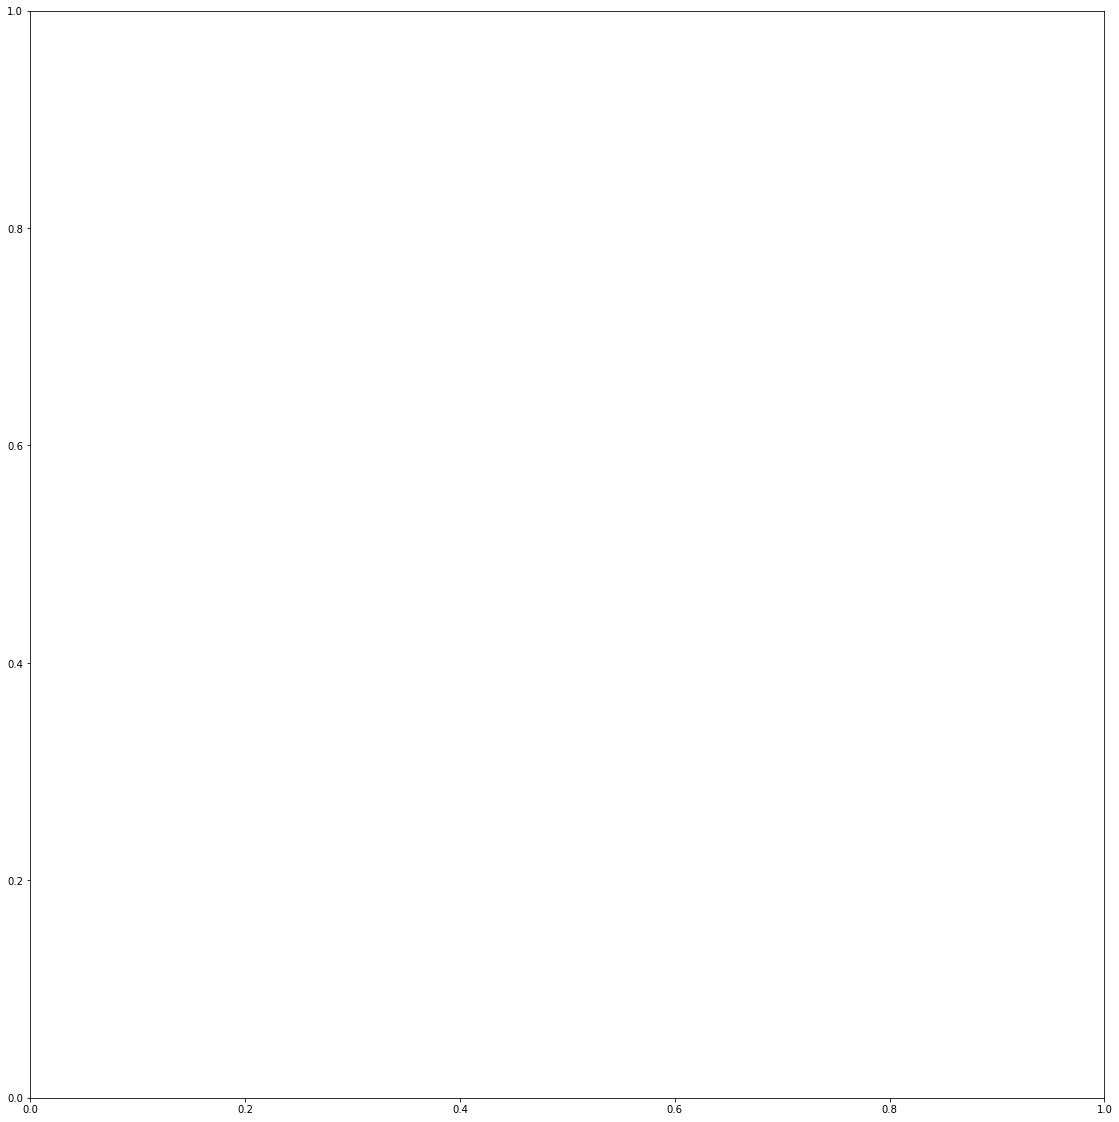

In [63]:
fig, ax = plt.subplots(figsize=(20, 20))
dataset1.plot( ax = ax, 
        column='Casos', 
         cmap= 'Red', 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined",  
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of cases in 2021 by the district ", 
                            title_fontsize = 'x-large', 
                            frameon= False ) )